# Workshop

- Course: GISC101: Financial Institutions and System
- University: Sogang University
- Professor: Iegor Vyshnevskyi, Ph.D.

# 1. Import dating

In [5]:
import pandas as pd

## 1.1 Importing data from your computer

In [4]:
import os
os.listdir("../../data/examples/")

['world_bank_data.csv']

In [6]:
df = pd.read_csv("../../data/examples/world_bank_data.csv")
df.head(2)

,Unnamed: 0,indicator,country,countryiso3code,date,value
0,0,GDP per capita (current US$),Canada,CAN,2023,53431.185706
1,1,GDP per capita (current US$),Canada,CAN,2022,55509.393176


## 1.2 Importing data from github
- Import data from Global Macro Database (import from Github)
- This is an amazing resource with macrodata from many different sources
    - https://github.com/KMueller-Lab/Global-Macro-Database/tree/main 

In [2]:
url = 'https://github.com/KMueller-Lab/Global-Macro-Database/raw/refs/heads/main/data/final/chainlinked_infl.dta'
df = pd.read_stata(url)
df.head(2)

,ISO3,year,ADB_infl,AHSTAT_infl,AMF_infl,BCEAO_infl,BIS_infl,BORDO_infl,CEPAC_infl,EUS_infl,...,OECD_KEI_infl,WB_CC_infl,WDI_infl,WDI_ARC_infl,CS1_infl,CS2_infl,infl,chainlinking_ratio,source,source_change
0,ZWE,2029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.131044,1.0,IMF_WEO,NaN
1,ZWE,2028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.108963,1.0,IMF_WEO,NaN


## 1.3 Importing data from an API

#### World bank

#### NO API REQUIRED

In [7]:
import requests
import pandas as pd

def download_worldbank(indicator, countries, date_start, date_end):
    url_base = 'http://api.worldbank.org/v2/'  # Base URL for the World Bank API
    country_codes = ';'.join(countries)  # Combine country codes into a string
    url = url_base + f'country/{country_codes}/indicator/{indicator}?date={date_start}:{date_end}&per_page=30000' #create the url with start and end date.
    url = url_base + f'country/{country_codes}/indicator/{indicator}?per_page=30000' # This line overrides the previous one. It will ignore start/end date.

    response = requests.get(url)  # Download data from the URL
    df = pd.read_xml(response.content)  # Convert the downloaded data to a table
    return df  # Return the table

In [9]:
# Example 1
data = download_worldbank(
    indicator = 'NY.GDP.PCAP.CD' , 
    countries = ['US', 'CA', 'MX', 'JP'],  
    date_start = '2021', 
    date_end = '2023'
)
data.head(2)

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,GDP per capita (current US$),Canada,CAN,2024,NaN,NaN,NaN,1
1,GDP per capita (current US$),Canada,CAN,2023,53431.185706,NaN,NaN,1


# 2. Visualization and Regression

## 2.A Data

In [26]:
data_folder = "../../data/examples"
os.listdir(data_folder)
df = pd.read_csv(f"{data_folder}/democracy_gdp.csv")
df_regression = df[['country', 'year','NGDPDPC', 'v2x_freexp']].dropna()
df_regression.head(2)

,country,year,NGDPDPC,v2x_freexp
105,Asia (avg),1990,3749.756571,0.424697
106,Asia (avg),1991,4234.663571,0.444273


In [28]:
import numpy as np
df_regression = df[['country', 'year','NGDPDPC', 'v2x_freexp']].dropna()
df_regression['NGDPDPC_log'] = df_regression['NGDPDPC'].apply(np.log)
df_regression['v2x_freexp_scale'] = df_regression['v2x_freexp'].multiply(100)
df_regression.head(2)

,country,year,NGDPDPC,v2x_freexp,NGDPDPC_log,v2x_freexp_scale
105,Asia (avg),1990,3749.756571,0.424697,8.229446,42.469697
106,Asia (avg),1991,4234.663571,0.444273,8.351059,44.427273


## 2.1 Scatter plot

<Axes: xlabel='v2x_freexp_scale', ylabel='NGDPDPC_log'>

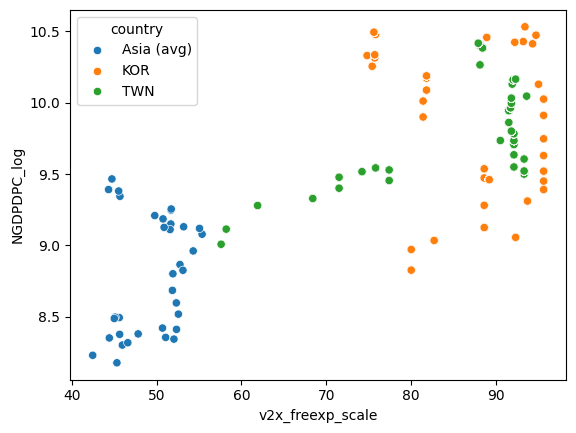

In [29]:
import seaborn as sns
sns.scatterplot(
    data = df_regression,
    y = 'NGDPDPC_log',
    x = 'v2x_freexp_scale',
    hue = 'country'
)

## 2.2 Regression

In [32]:
y_col = 'NGDPDPC_log'
x_col = 'v2x_freexp'
x = df_regression[x_col]
x = sm.add_constant(x)

y = df_regression[y_col]

#### Interpretation: A 1-unit increase in the freedom of expression score is associated with an approximate 1.37% increase in GDP per capita, holding all else constant.

In [33]:
import statsmodels.api as sm
reg = sm.OLS(y, x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NGDPDPC_log   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     424.4
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           3.35e-90
Time:                        12:45:02   Log-Likelihood:                -2715.4
No. Observations:                4515   AIC:                             5435.
Df Residuals:                    4513   BIC:                             5448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6312      0.058    149.198      0.000       8.518       8.745
v2x_freexp     1.3788      0.067     20.601      0.000       1.248       1.510
==============================================================================
Omnibus:                      707.005   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.269
Skew:                          -0.005   Prob(JB):                     5.80e-36
Kurtosis:                       2.071   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3. Machine Learning

## 3.A Data

- FRED-MD and FRED-QD: Monthly and Quarterly Databases for Macroeconomic Research
    - https://www.stlouisfed.org/research/economists/mccracken/fred-databases

In [39]:
import pandas as pd
url = 'https://www.stlouisfed.org/-/media/project/frbstl/stlouisfed/research/fred-md/quarterly/current.csv?sc_lang=en&hash=C6C361D34E485D489591D9E9752CB756'
df = pd.read_csv(url, header = [0], skiprows = [1,2], index_col = [0], parse_dates = True)
df.tail(2)

,GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,PRFIx,...,TNWMVBSNNCBBDIx,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P div yield,S&P PE ratio
sasdate,,,,,,,,,,,,,,,,,,,,,
2024-12-01,23542.349,16273.191,2120.9610,10736.2567,3452.8476,4315.094,4265.6260,1330.3946,3512.4265,796.6561,...,1013.83,10103165.94,387134.05,22562346.67,12330.2,472.47,2609.7332,5911.05,1.2581,29.9504
2025-03-01,23528.047,16321.051,2100.6201,10781.3509,3471.7122,4556.802,4346.2162,1406.0377,3599.9432,795.4804,...,NaN,NaN,NaN,NaN,NaN,NaN,2437.5490,5900.73,1.2841,29.7987


## 3.B Lead GDP so we can use lags of other variables to predict

In [40]:
df['GDP_lead1'] = df['GDPC1'].shift(-1)
df = df[['GDP_lead1'] + list(df.columns[:-1])]
df.head(2)

,GDP_lead1,GDPC1,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,...,TNWMVBSNNCBBDIx,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P div yield,S&P PE ratio
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-03-01,3427.667,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,...,1341.67,333245.24,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211
1959-06-01,3430.057,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,...,1294.15,345845.01,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899


## 2.1 Machine learning: Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

/var/folders/k9/3kvg9l4d0sz7kr8v4sdn4y_40000gn/T/ipykernel_75975/745763745.py:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data = df[regressors + [variable_to_predict]].pct_change(4).multiply(100).dropna()


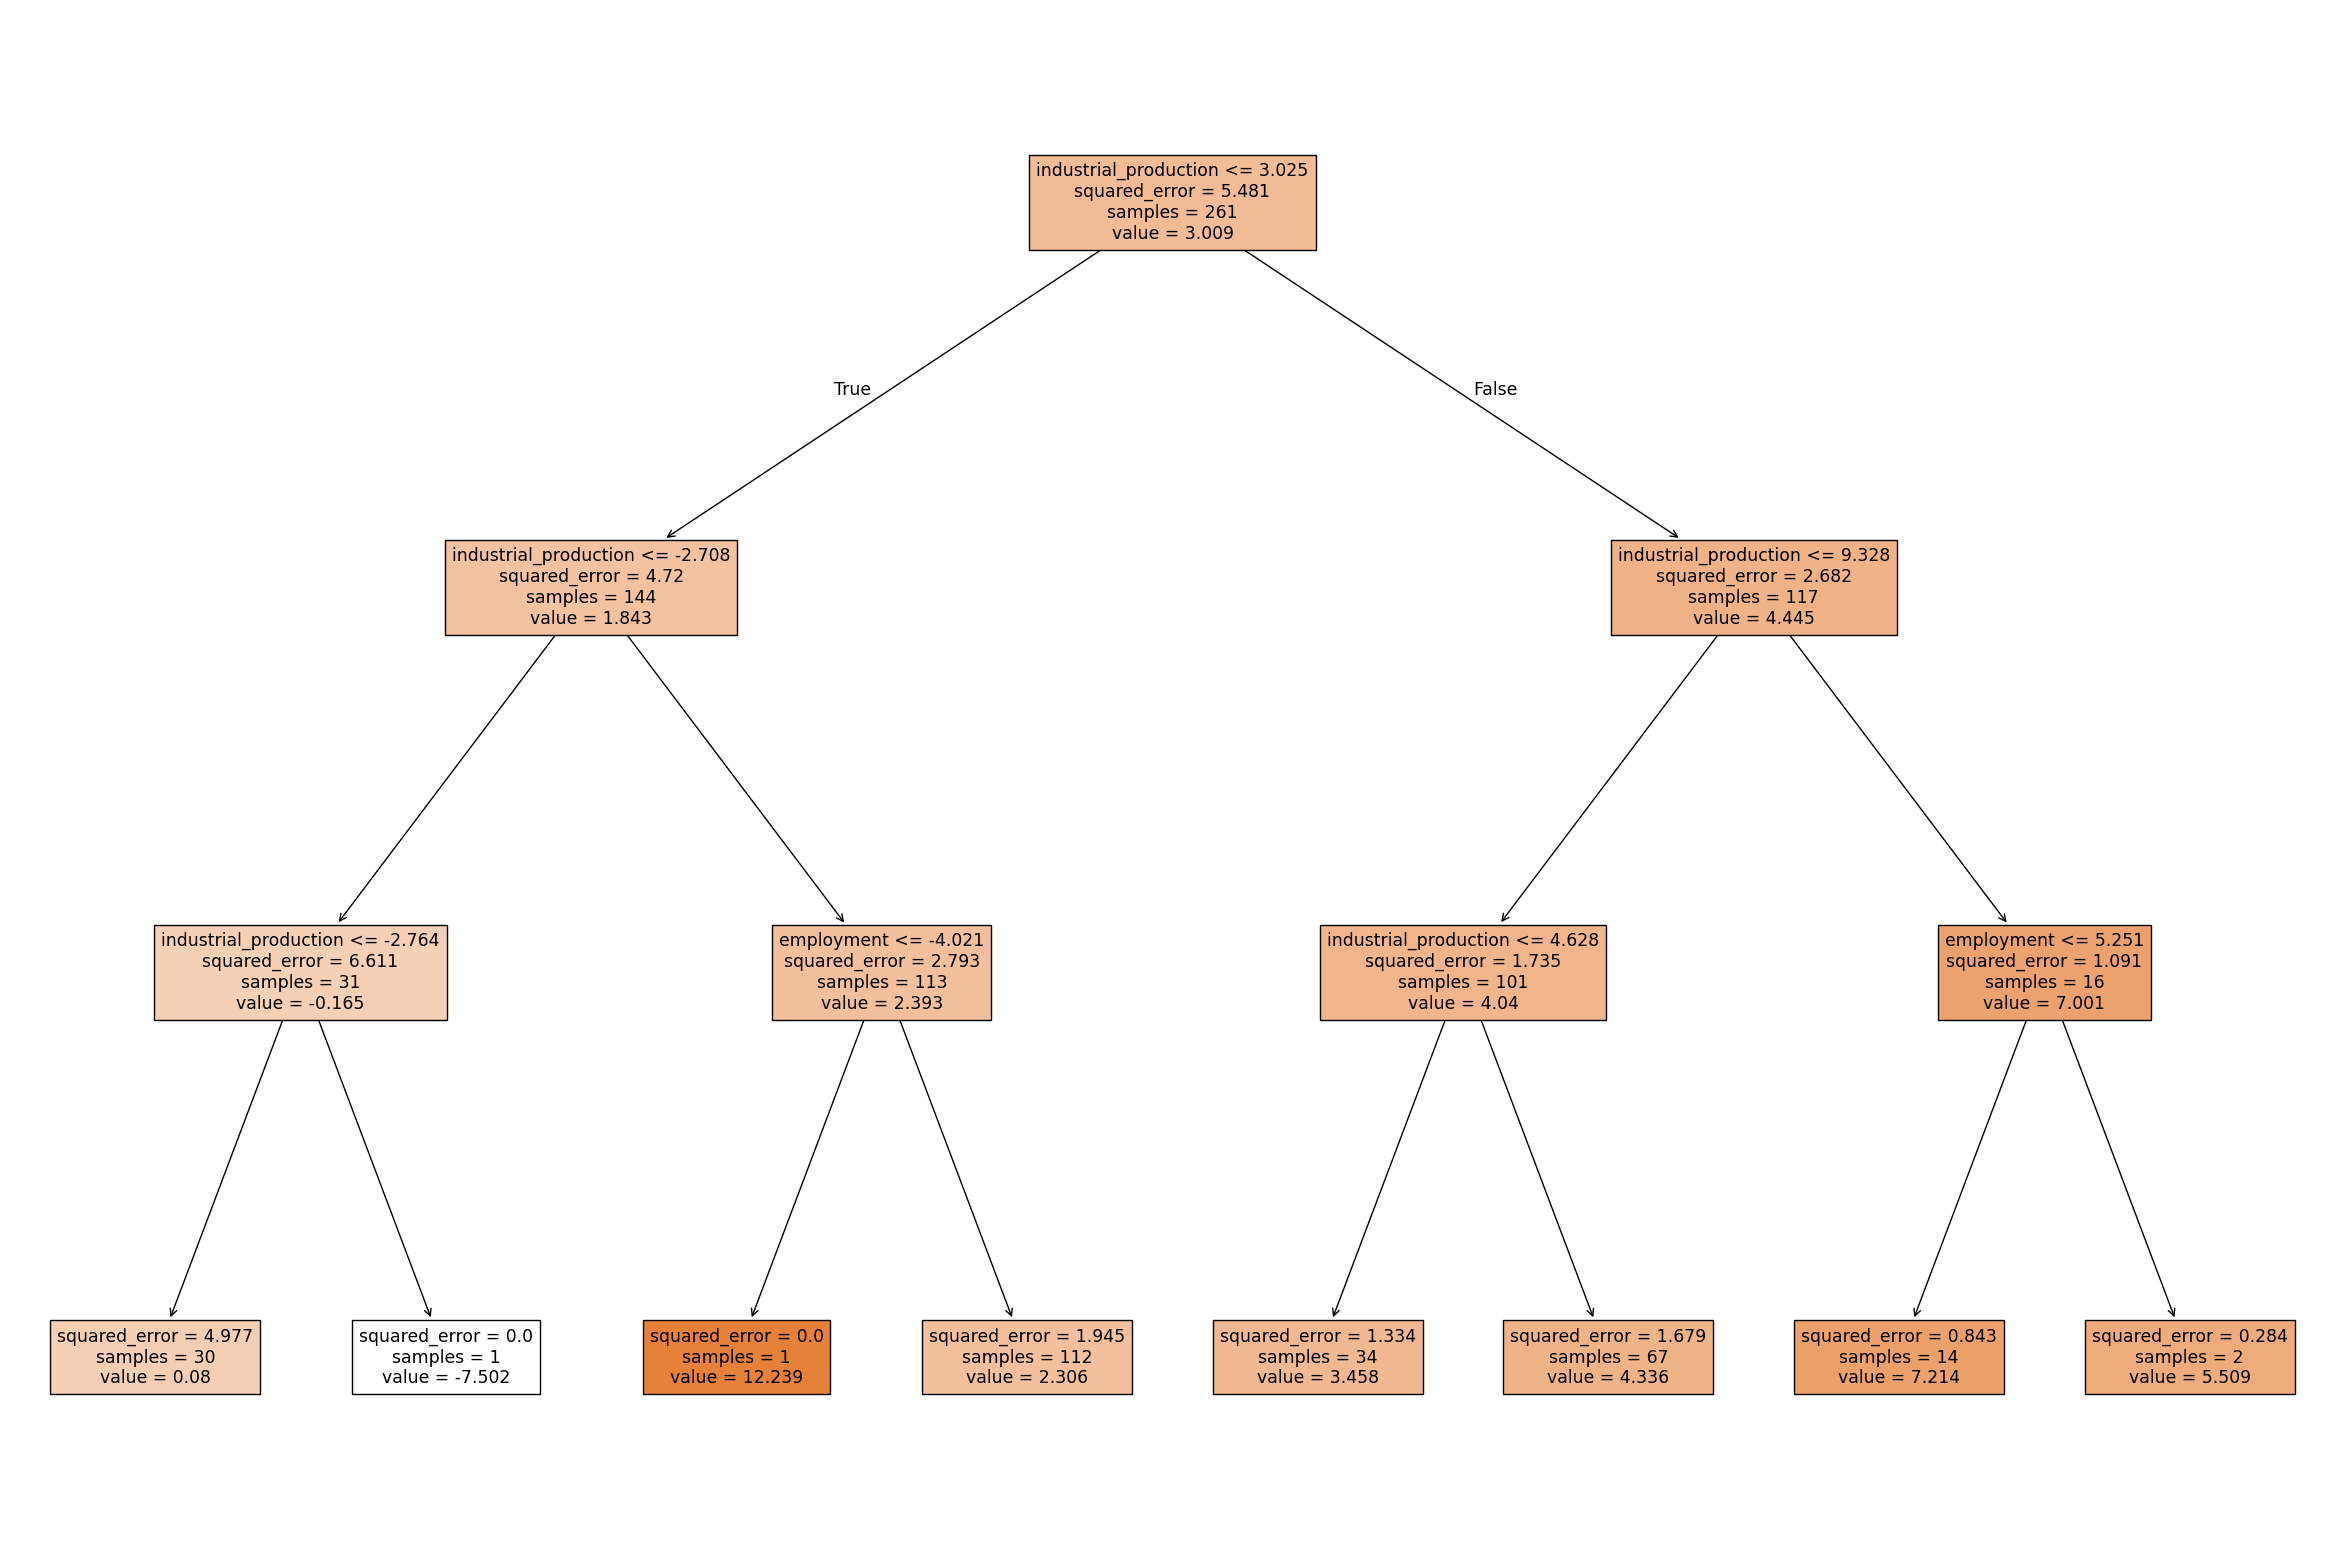

In [79]:
# Define the mapping for renaming columns
column_mapping = {'INDPRO': 'industrial_production', 'PAYEMS': 'employment', 'EXPGSC1': 'exports', 'GDP_lead1': 'gdp_lead1'}

# Rename the columns in the DataFrame
df = df.rename(columns=column_mapping)

# Define the variables
regressors = ['industrial_production', 'employment', 'exports']
variable_to_predict = 'gdp_lead1'

# Calculate percentage change and drop null values
data = df[regressors + [variable_to_predict]].pct_change(4).multiply(100).dropna()

# Define the features and target variable
X = data[regressors]
y = data[variable_to_predict]

# Create and train the Decision Tree Regressor
dtree = DecisionTreeRegressor(max_depth=3)
dtree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(30, 20))
plot_tree(dtree, feature_names=X.columns, filled=True)
plt.show()

## 2.2 Neural Network

### 2.2.1 Prediction

R² on training data: 0.52


/Users/corybaird/Desktop/Lectures/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


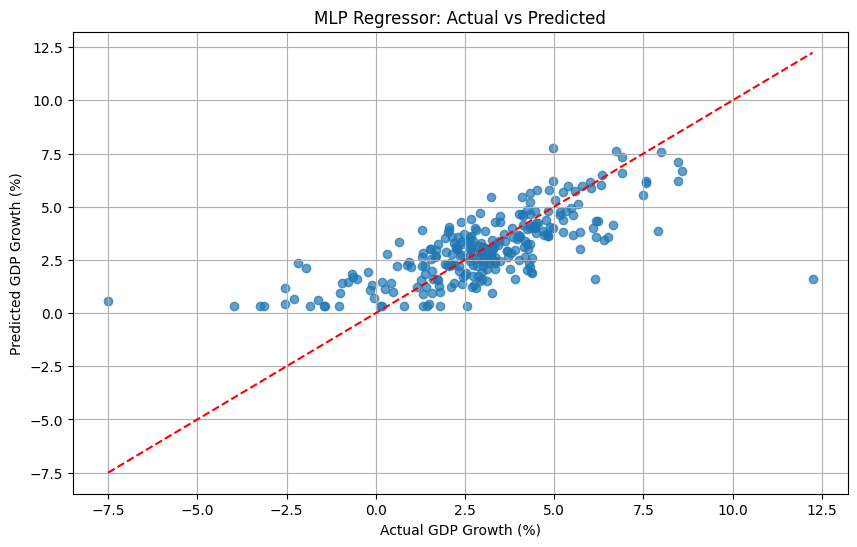

In [88]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train the MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(5, 4), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_scaled, y)

# Evaluate performance
r2_score = mlp.score(X_scaled, y)
print(f"R² on training data: {r2_score:.2f}")

# Optional: Plot predicted vs actual values
y_pred = mlp.predict(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Actual GDP Growth (%)")
plt.ylabel("Predicted GDP Growth (%)")
plt.title("MLP Regressor: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of perfect prediction
plt.grid(True)
plt.show()

### 2.2.2 Visualizing the network

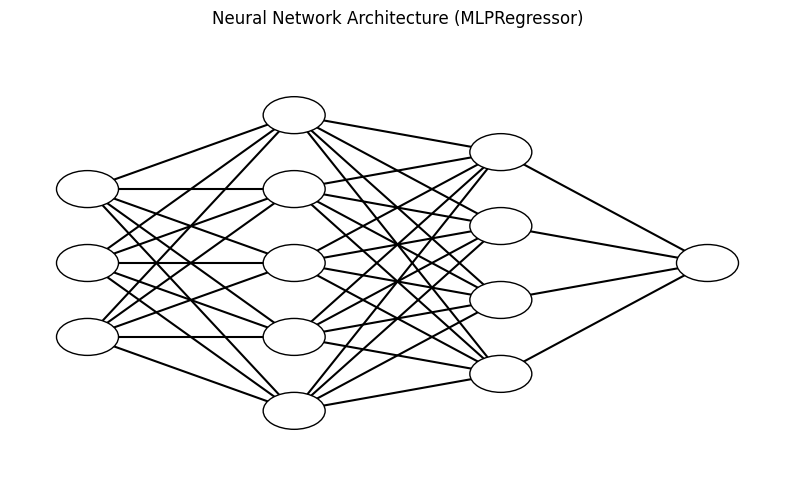

In [96]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for i, n in enumerate(layer_sizes):
        layer_top = v_spacing*(n - 1)/2. + (top + bottom)/2.
        for j in range(n):
            circle = plt.Circle((left + i*h_spacing, layer_top - j*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)

    # Edges
    for i, (n1, n2) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top1 = v_spacing*(n1 - 1)/2. + (top + bottom)/2.
        layer_top2 = v_spacing*(n2 - 1)/2. + (top + bottom)/2.
        for j in range(n1):
            for k in range(n2):
                line = plt.Line2D([left + i*h_spacing, left + (i + 1)*h_spacing],
                                  [layer_top1 - j*v_spacing, layer_top2 - k*v_spacing], c='k')
                ax.add_artist(line)

# Example: Visualize your MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(5, 4), random_state=42)
layer_sizes = [X.shape[1]] + list(mlp.hidden_layer_sizes) + [1]  # [input, hidden..., output]

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.title("Neural Network Architecture (MLPRegressor)")
plt.show()


### 2.2.3 Visualize the important Layers

/Users/corybaird/Desktop/Lectures/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


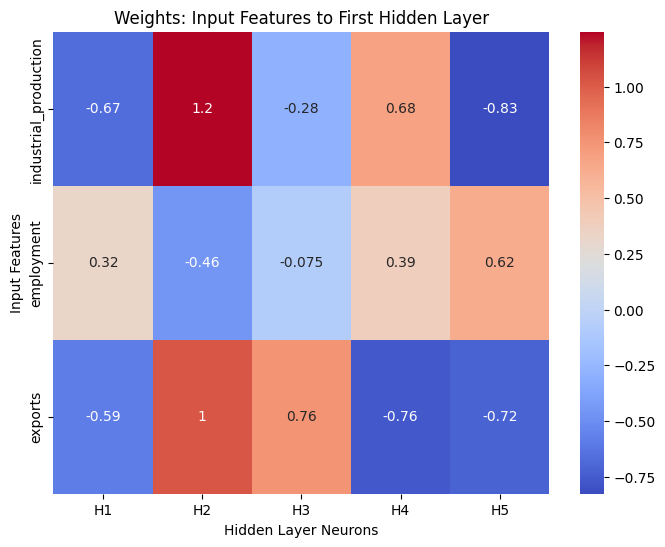

In [94]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model (make sure this runs before accessing coefs_)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mlp = MLPRegressor(hidden_layer_sizes=(5, 4), max_iter=1000, random_state=42)
mlp.fit(X_scaled, y)  # <-- MUST be called before accessing weights

# Now you can safely access weights
weights = mlp.coefs_[0]  # Input layer to first hidden layer

# Plot the weight heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(weights, annot=True, cmap='coolwarm',
            xticklabels=[f"H{i+1}" for i in range(weights.shape[1])],
            yticklabels=X.columns)
plt.title("Weights: Input Features to First Hidden Layer")
plt.xlabel("Hidden Layer Neurons")
plt.ylabel("Input Features")
plt.show()
